In [10]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch

from sklearn.cluster import KMeans
from urllib.request import urlopen

from PIL import Image
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch
from mplsoccer.utils import add_image

In [11]:
df=pd.read_csv(r'C:\Users\User\OneDrive\Pictures\CSV Files\FCB.csv')

In [12]:
df

,player,x,y,endx,endy,team,outcome,minute
0,Memphis Depay,50.3,50.1,44.2,47.6,65,Successful,0
1,Sergio Busquets,45.6,45.5,42.0,29.8,65,Successful,0
2,Frenkie de Jong,42.0,29.8,30.5,67.0,65,Successful,0
3,Gerard Piqué,31.3,72.0,33.4,89.1,65,Successful,0
4,Jordi Alba,33.2,88.9,9.1,61.5,65,Successful,0
...,...,...,...,...,...,...,...,...
3930,Clément Lenglet,53.2,96.0,72.6,82.0,65,Successful,94
3931,David Soria,23.2,23.6,61.6,39.5,819,Unsuccessful,94
3932,Clément Lenglet,32.2,65.8,33.7,65.2,65,Unsuccessful,94
3933,José Macías,72.2,39.1,77.5,30.1,819,Successful,94


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch

from sklearn.cluster import KMeans

In [14]:
df['beginning'] = np.sqrt(np.square(120-df['x']) + np.square(40 - df['y']))
df['end'] = np.sqrt(np.square(120 - df['endx']) + np.square(40 - df['endy']))

df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]

In [15]:
df = df[(df['team']==65)]

In [16]:
df

,player,x,y,endx,endy,team,outcome,minute,beginning,end,progressive
0,Memphis Depay,50.3,50.1,44.2,47.6,65,Successful,0,70.427977,76.180050,False
1,Sergio Busquets,45.6,45.5,42.0,29.8,65,Successful,0,74.603016,78.664096,False
2,Frenkie de Jong,42.0,29.8,30.5,67.0,65,Successful,0,78.664096,93.483956,False
3,Gerard Piqué,31.3,72.0,33.4,89.1,65,Successful,0,94.295758,99.550841,False
4,Jordi Alba,33.2,88.9,9.1,61.5,65,Successful,0,99.626553,112.964862,False
...,...,...,...,...,...,...,...,...,...,...,...
3926,Memphis Depay,85.4,81.2,87.5,86.2,65,Successful,94,53.801487,56.486193,False
3927,Gavi,91.7,82.7,87.0,71.8,65,Successful,94,51.226751,45.828375,False
3928,Nico González,87.0,71.8,92.0,67.6,65,Unsuccessful,94,45.828375,39.316154,False
3930,Clément Lenglet,53.2,96.0,72.6,82.0,65,Successful,94,87.167884,63.330561,True


In [17]:
df=df[df['player']=="Frenkie de Jong"].reset_index()

In [18]:
X = np.array(df[['x','y','endx','endy']])
kmeans = KMeans(n_clusters = 10,random_state=100)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

In [19]:
df.cluster.value_counts()

8    39
7    36
3    35
9    32
1    31
0    28
5    27
2    22
6    16
4    15
Name: cluster, dtype: int64

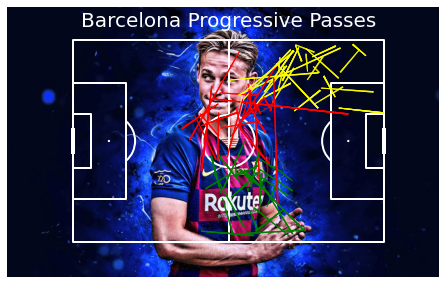

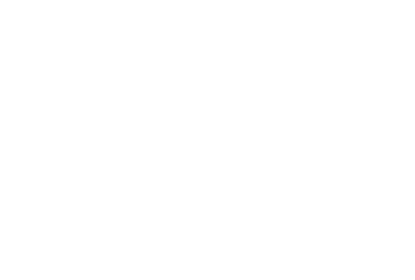

In [24]:

image = Image.open(r'C:\Users\User\Downloads\FDJ.jpg')
pitch = Pitch(pitch_type='opta',orientation='horizontal',
             pitch_color='none',line_color='white',figsize=(10,10),
             constrained_layout=False,tight_layout=True,view='full')

fig, ax = pitch.draw(tight_layout=False)
for x in range(len(df['cluster'])):
    
    if df['cluster'][x] ==8:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endx'][x],yend=df['endy'][x],
                   color='green',lw=1.5,zorder=2,comet=True,ax=ax)
        
    if df['cluster'][x] ==7:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endx'][x],yend=df['endy'][x],
                   color='#ffff00',lw=1.5,zorder=2,comet=True,ax=ax)
    if df['cluster'][x] ==3:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endx'][x],yend=df['endy'][x],
                   color='red',lw=1.5,zorder=2,comet=True,ax=ax)
        
ax_image = add_image(image, fig, left=0, bottom=0, width=1, height=1)
ax.set_title("Barcelona Progressive Passes",color="w",size=20)
ax.set_zorder(1)
ax_image.set_zorder(0)
fig,ax = pitch.draw()